In [1]:
import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np
import pandas as pd

import seaborn as sns
import joblib

import sys
sys.path.append('../src/')
import data_loader
import config

In [2]:
# Load the model
model_path = '../models/classifier_model.joblib'
model = joblib.load(model_path)

In [9]:
# Load the data
X, y = data_loader.load_data()

In [10]:
# Optional: Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [11]:
# Train the model on the training data
model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 20, number of negative: 52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4140
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 220
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.277778 -> initscore=-0.955511
[LightGBM] [Info] Start training from score -0.955511
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(boosting_type='dart', is_unbalance=True,
               learning_rate=0.24268386588455537, max_depth=9, n_estimators=257,
               num_leaves=236, objective='binary')

In [12]:
# Make predictions on the test data
y_pred = model.predict_proba(X_test)[:, 1]

# or predict on the test set
#y_pred = model.predict(X_test)

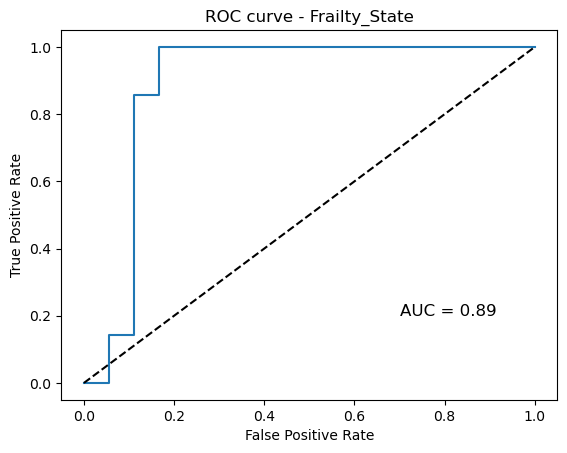

In [13]:
# Plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score


fpr, tpr, _ = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Frailty_State')
plt.plot([0, 1], [0, 1], 'k--')

plt.text(0.7, 0.2, f'AUC = {auc:.2f}', fontsize=12)

plt.show()


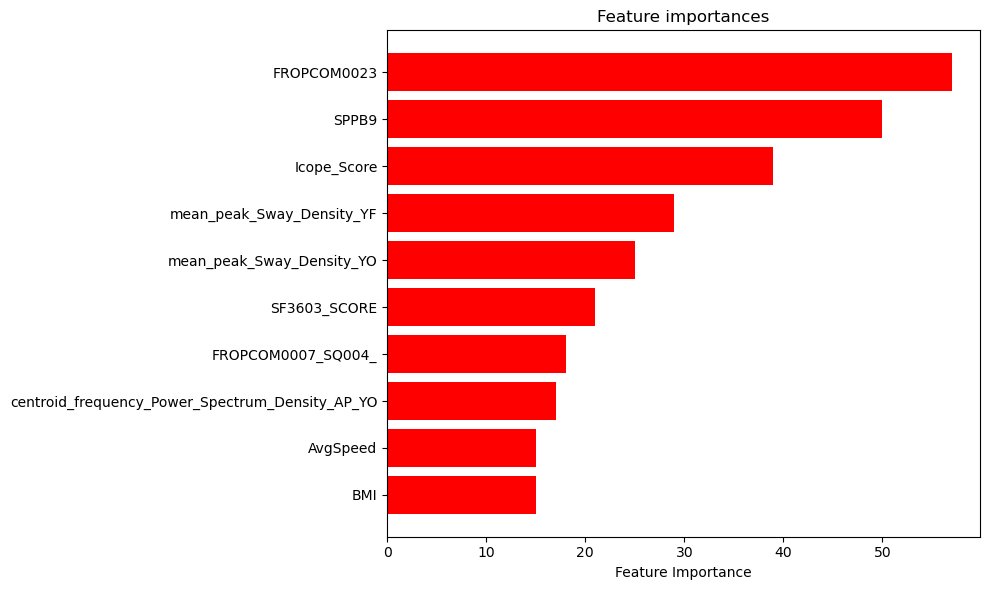

In [14]:
# # Plot the 10 most important features
feature_importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))  
plt.title("Feature importances")
plt.barh(range(10), feature_importances[indices[:10]], color="r", align="center")
plt.yticks(range(10), feature_names[indices[:10]])
plt.gca().invert_yaxis()  # invert y-axis to have the most important feature on top
plt.xlabel("Feature Importance")
plt.tight_layout()  # adjust layout to fit all labels
plt.show()
